In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

categories = ['Travel', 'Savings - Bank', 'Rent', 'Utilities', 'Groceries', 'Utilities - Electricity', 'Loan - Credit Card', 'Dining', 'Investment - Mutual Funds']
transaction_types = ['Debit', 'Credit']
sources = ['Digital Wallet', 'Bank Account', 'Credit Card']


In [29]:
def simulate_transactions(num_transactions=1000):
    data = {
        'TransactionID': range(1, num_transactions + 1),
        'Amount': [round(np.random.uniform(10, 5000), 2) for _ in range(num_transactions)],
        'Date': pd.date_range(start='2023-01-01', periods=num_transactions, freq='D'),
        'Category': [random.choice(categories) for _ in range(num_transactions)],
        'TransactionType': [random.choice(transaction_types) for _ in range(num_transactions)],
        'Source': [random.choice(sources) for _ in range(num_transactions)],
    }
    return pd.DataFrame(data)


In [30]:

transactions_df = simulate_transactions()
transactions_df

,TransactionID,Amount,Date,Category,TransactionType,Source
0,1,2024.66,2023-01-01,Investment - Mutual Funds,Credit,Bank Account
1,2,2515.75,2023-01-02,Utilities - Electricity,Debit,Bank Account
2,3,1500.82,2023-01-03,Utilities,Credit,Credit Card
3,4,4692.98,2023-01-04,Utilities - Electricity,Debit,Digital Wallet
4,5,4304.72,2023-01-05,Dining,Credit,Digital Wallet
...,...,...,...,...,...,...
995,996,500.66,2025-09-22,Rent,Credit,Credit Card
996,997,4598.32,2025-09-23,Dining,Credit,Digital Wallet
997,998,1653.28,2025-09-24,Utilities,Debit,Credit Card
998,999,1741.16,2025-09-25,Travel,Credit,Credit Card


In [31]:
transactions_df.to_csv('financial_transactions1.csv', index=False)


In [32]:
def plot_total_spending_over_time(transactions_df):
    plt.figure(figsize=(12, 6))
    transactions_df.groupby(transactions_df['Date'].dt.to_period('M'))['Amount'].sum().plot()
    plt.title('Total Spending Trend Over Time')
    plt.ylabel('Total Amount Spent')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

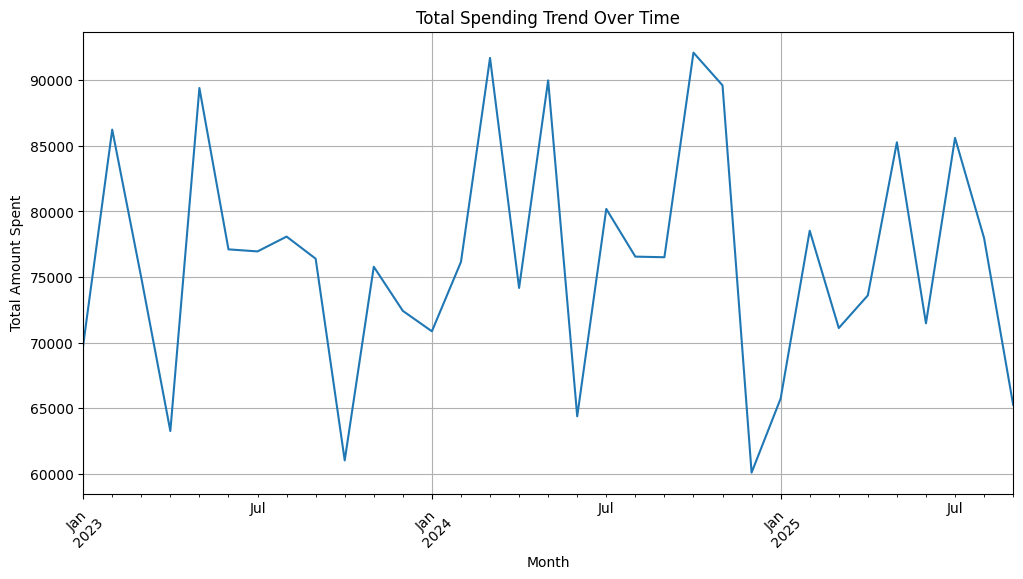

In [33]:
plot_total_spending_over_time(transactions_df)

In [34]:
def plot_monthly_spending_by_category(transactions_df):
    monthly_spending = transactions_df.groupby([transactions_df['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().unstack().fillna(0)
    monthly_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Monthly Spending Breakdown by Category')
    plt.ylabel('Total Amount Spent')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

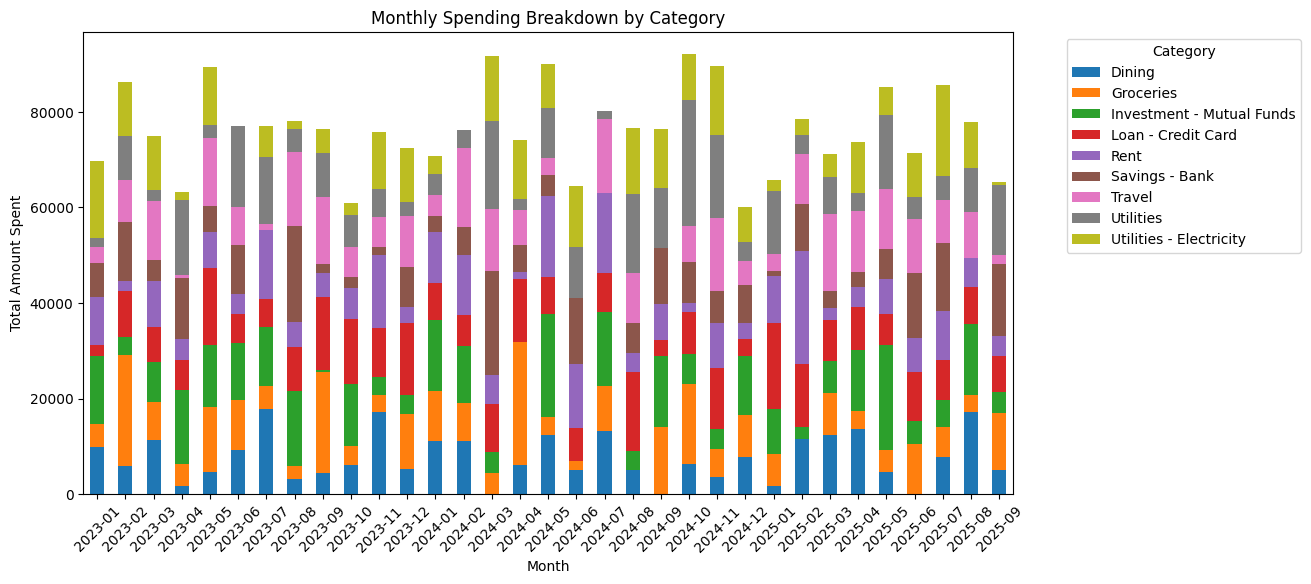

In [35]:
plot_monthly_spending_by_category(transactions_df)

In [36]:
def plot_income_sources(transactions_df):
    monthly_income = transactions_df[transactions_df['TransactionType'] == 'Credit']
    income_sources = monthly_income.groupby([monthly_income['Date'].dt.to_period('M'), 'Source'])['Amount'].sum().unstack().fillna(0)
    income_sources.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Monthly Income Sources')
    plt.ylabel('Total Income Amount')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

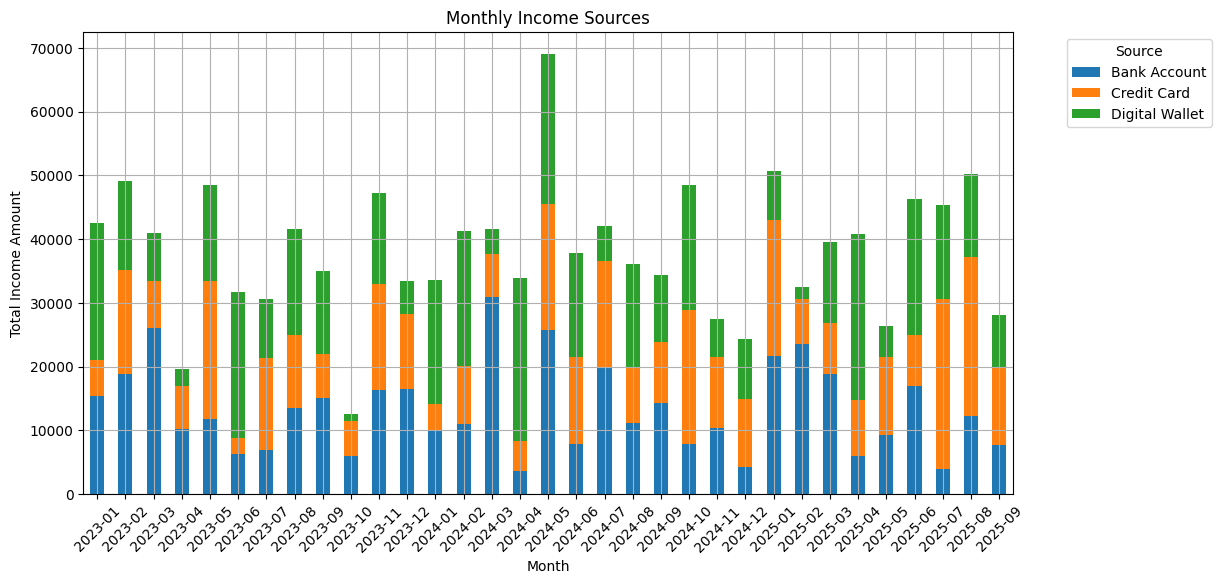

In [37]:
plot_income_sources(transactions_df)

In [38]:
def plot_savings_opportunities(transactions_df):
    potential_savings = transactions_df[transactions_df['TransactionType'] == 'Debit'].groupby('Category')['Amount'].sum()
    plt.figure(figsize=(12, 6))
    potential_savings.plot(kind='bar', color='orange')
    plt.title('Potential Savings Opportunities by Category')
    plt.ylabel('Total Amount Spent on Debits')
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

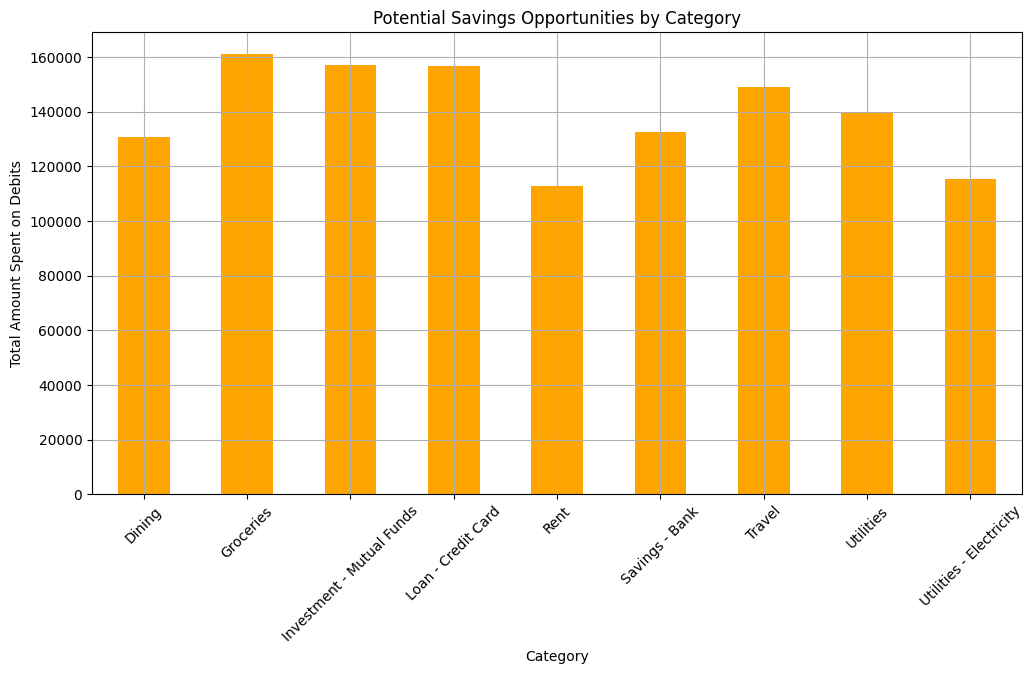

In [39]:
plot_savings_opportunities(transactions_df)

In [40]:
def categorize_transactions(transactions_df):
    transactions_df['Category'] = transactions_df['Category'].astype('category').cat.codes
    transactions_df['TransactionType'] = transactions_df['TransactionType'].astype('category').cat.codes
    transactions_df['Source'] = transactions_df['Source'].astype('category').cat.codes

    model = IsolationForest(contamination=0.05)
    transactions_df['Anomaly'] = model.fit_predict(transactions_df[['Amount', 'Category', 'TransactionType', 'Source']])
    return transactions_df

In [41]:
categorize_transactions(transactions_df)

,TransactionID,Amount,Date,Category,TransactionType,Source,Anomaly
0,1,2024.66,2023-01-01,2,0,0,1
1,2,2515.75,2023-01-02,8,1,0,1
2,3,1500.82,2023-01-03,7,0,1,1
3,4,4692.98,2023-01-04,8,1,2,-1
4,5,4304.72,2023-01-05,0,0,2,1
...,...,...,...,...,...,...,...
995,996,500.66,2025-09-22,4,0,1,1
996,997,4598.32,2025-09-23,0,0,2,1
997,998,1653.28,2025-09-24,7,1,1,1
998,999,1741.16,2025-09-25,6,0,1,1


In [42]:
def plot_anomalies(transactions_df):
    anomalies = transactions_df[transactions_df['Anomaly'] == -1]
    plt.figure(figsize=(12, 6))
    plt.scatter(anomalies['Date'], anomalies['Amount'], color='red', label='Anomalies')
    plt.title('Anomalous Spending Patterns')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.grid()
    plt.show()

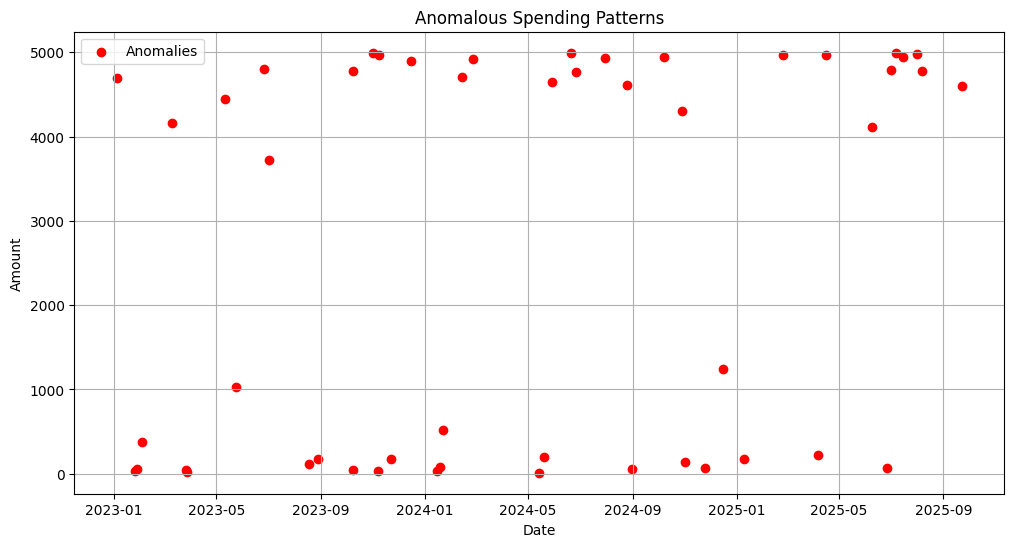

In [43]:
transactions_df = categorize_transactions(transactions_df)
plot_anomalies(transactions_df)

In [44]:
# Data Preprocessing for Future predictions 
df =pd.read_csv('financial_transactions1.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfMonth'] = df['Date'].dt.day


In [45]:

le_category = LabelEncoder()
le_source = LabelEncoder()
df['Category_encoded'] = le_category.fit_transform(df['Category'])
df['Source_encoded'] = le_source.fit_transform(df['Source'])


In [46]:
df.sort_values('Date', inplace=True)
df['Amount_lag'] = df['Amount'].shift(1)
df['Amount_lag'].fillna(0, inplace=True)


In [47]:

features = df[['Month', 'DayOfWeek', 'DayOfMonth', 'Category_encoded', 'Source_encoded', 'Amount_lag']]
target = df['Amount']


In [48]:

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [50]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
cv_scores = cross_val_score(model, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated Mean Squared Error: {-cv_scores.mean()}')


Mean Squared Error: 2372938.096572733
Cross-validated Mean Squared Error: 2271550.905223678


In [51]:
future_data = pd.DataFrame({
    'Month': [2, 3],
    'DayOfWeek': [1, 2],
    'DayOfMonth': [1, 2],
    'Category_encoded': le_category.transform(['Travel', 'Dining']),
    'Source_encoded': le_source.transform(['Digital Wallet', 'Credit Card']),
    'Amount_lag': [1000, 1500]  
})

In [52]:
future_data_scaled = scaler.transform(future_data)
future_predictions = model.predict(future_data_scaled)
print('Future Expense Predictions:', future_predictions)


Future Expense Predictions: [3526.8699 2800.9702]
